In [72]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import sys
sys.path.insert(0,"/Users/sarahburgart/galvanize/week6/random-forests/src/")

In [76]:
import roc
from roc import plot_roc

In [78]:
plot_roc

<function roc.plot_roc(X, y, clf_class, plot_name, **kwargs)>

In [2]:
# practice using the scikit-learn implementation of random forests.
# each row is a customer


# load the data

churn = pd.read_csv("/Users/sarahburgart/galvanize/week6/random-forests/data/churn.csv")

churn.info()
                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [3]:
churn.head()
type(churn["Churn?"][0])
# convert Int'l Plan, VMail Plan, Churn? 0 = False, 1 = True

str

In [4]:
churn.replace("no", False, inplace=True)
churn.replace("yes", True, inplace=True)
churn.replace("False.", False, inplace=True)
churn.replace("True.", True, inplace=True)

In [5]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
type(churn["Churn?"][0])

numpy.bool_

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null bool
VMail Plan        3333 non-null bool
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null bool
dtypes: bool(3), float64(8), int64(8), object(2)
memory usage: 478.5+ KB


In [8]:
churn.drop("State", axis=1,inplace=True)
churn.drop("Phone", axis=1,inplace=True)

In [9]:
churn["Area Code"].value_counts()

415    1655
510     840
408     838
Name: Area Code, dtype: int64

In [10]:
churn.drop("VMail Message", axis=1,inplace=True)

In [11]:
churn.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,False,True,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,False,True,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,False,False,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,True,False,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,True,False,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
y = churn["Churn?"].values

In [13]:
X = churn.drop("Churn?", axis=1).values

In [14]:
X


array([[128, 415, False, ..., 3, 2.7, 1],
       [107, 415, False, ..., 3, 3.7, 1],
       [137, 415, False, ..., 5, 3.29, 0],
       ...,
       [28, 510, False, ..., 6, 3.81, 2],
       [184, 510, True, ..., 10, 1.35, 2],
       [74, 415, False, ..., 4, 3.7, 0]], dtype=object)

In [15]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [16]:
X

array([[128, 415, False, ..., 3, 2.7, 1],
       [107, 415, False, ..., 3, 3.7, 1],
       [137, 415, False, ..., 5, 3.29, 0],
       ...,
       [28, 510, False, ..., 6, 3.81, 2],
       [184, 510, True, ..., 10, 1.35, 2],
       [74, 415, False, ..., 4, 3.7, 0]], dtype=object)

In [18]:
# out of bag score of the training set 
model.oob_score_

0.9287715086034414

In [19]:
confusion_matrix(ytest, base_test)

array([[717,   2],
       [ 46,  69]])

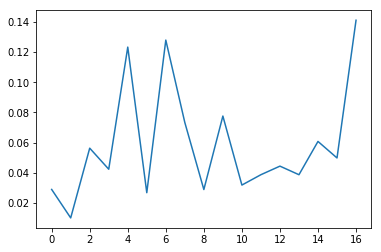

In [20]:
features = model.feature_importances_
xpts = range(17)
plt.plot(xpts,features);

In [21]:
col_list = list(enumerate(churn.columns))
col_list

[(0, 'Account Length'),
 (1, 'Area Code'),
 (2, "Int'l Plan"),
 (3, 'VMail Plan'),
 (4, 'Day Mins'),
 (5, 'Day Calls'),
 (6, 'Day Charge'),
 (7, 'Eve Mins'),
 (8, 'Eve Calls'),
 (9, 'Eve Charge'),
 (10, 'Night Mins'),
 (11, 'Night Calls'),
 (12, 'Night Charge'),
 (13, 'Intl Mins'),
 (14, 'Intl Calls'),
 (15, 'Intl Charge'),
 (16, 'CustServ Calls'),
 (17, 'Churn?')]

In [22]:
# "Day Mins", "Day Calls", "CustServ Calls" - are "feature important" ... " Night charge, Int'l plan"

In [23]:
# Try 5-10 different values for the number of trees 
# make a graph of the number of trees versus the accuracy score
scores = []
ns = np.random.choice(500,10)
for n in ns:
    model = RandomForestClassifier(oob_score=True, n_estimators=n)
    model.fit(Xtrain,ytrain)
    base_test = model.predict(Xtest)
    # accuracy of test set
    model.score(Xtest, ytest)
    
    scores.append(model.score(Xtest, ytest) )

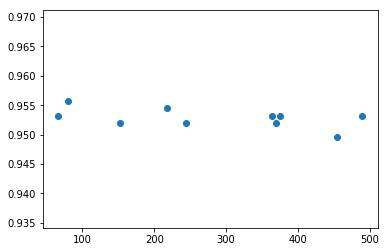

In [24]:
plt.scatter(ns, scores);

In [25]:
ns

array([364, 370, 244, 454, 218,  80, 490, 152,  66, 375])

In [26]:
min(scores) - max(scores)

-0.005995203836930529

In [27]:
np.mean(scores)

0.9528776978417266

In [28]:
list(range(17))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [29]:
# changing num_ features
# Try 5-10 different values for the number of trees 
# make a graph of the number of trees versus the accuracy score
scores = []
#ns = np.random.choice(500,10)
num_features = range(1,18)
for n in num_features:
    model = RandomForestClassifier(oob_score=True, n_estimators=100, max_features=n)
    model.fit(Xtrain,ytrain)
    base_test = model.predict(Xtest)
    # accuracy of test set
    model.score(Xtest, ytest)
    
    scores.append(model.score(Xtest, ytest) )

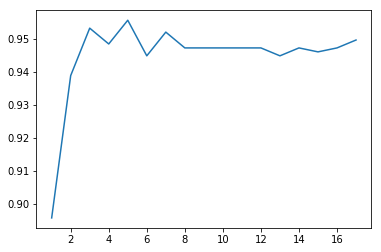

In [30]:
plt.plot(num_features,scores);

In [32]:
model_names = ["Random Forest Classifier", "Logistic Regression", "Decision Trees", "KNN"]
accuracy_scores = [model.score(Xtest,ytest)]
precision_scores = [precision_score(ytest, base_test)]
recall_scores = [recall_score(ytest, base_test)]

In [63]:
model = RandomForestClassifier(oob_score=True, n_estimators=260)
model.fit(Xtrain,ytrain)
base_test = model.predict(Xtest)
# accuracy of test set
model.score(Xtest, ytest), precision_score(ytest, base_test), recall_score(ytest, base_test)

(0.9520383693045563, 0.9213483146067416, 0.7130434782608696)

In [56]:
# decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(Xtrain, ytrain)
dt_hat = dt_model.score(Xtest, ytest)
dt_model.score(Xtest, ytest) #, recall_score(ytest, dt_hat) #precision_score(ytest, dt_hat),

0.919664268585132

In [59]:
# logistic regression
reg_model = LogisticRegression()
reg_model.fit(Xtrain, ytrain)
reg_hat = reg_model.predict(Xtest)
reg_model.score(Xtest, ytest), precision_score(ytest, reg_hat), recall_score(ytest, reg_hat)

/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.8836930455635491, 0.75, 0.23478260869565218)

In [58]:
knn_model = KNeighborsClassifier()
knn_model.fit(Xtrain, ytrain)
knn_hat = knn_model.predict(Xtest)
knn_model.score(Xtest, ytest), precision_score(ytest, knn_hat), recall_score(ytest, knn_hat)

(0.8633093525179856, 0.5128205128205128, 0.17391304347826086)

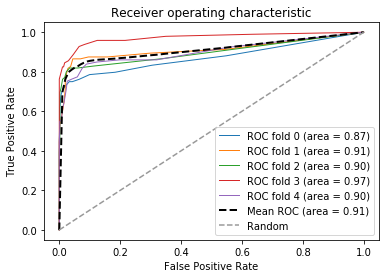

/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

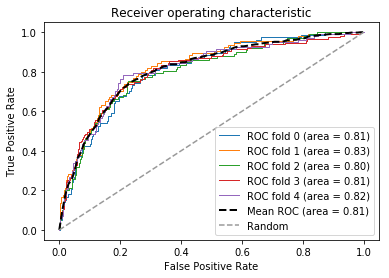

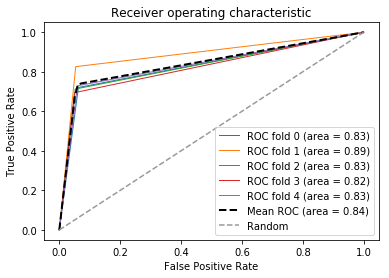

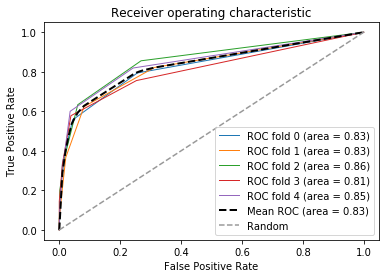

In [95]:
plot_roc(X, y, RandomForestClassifier, "Random Forest", n_estimators=20)
plot_roc(X, y, LogisticRegression, "Logistic Regression")
plot_roc(X, y,  DecisionTreeClassifier, " DecisionTreeClassifier")
plot_roc(X, y, KNeighborsClassifier, "KNeighborsClassifier")

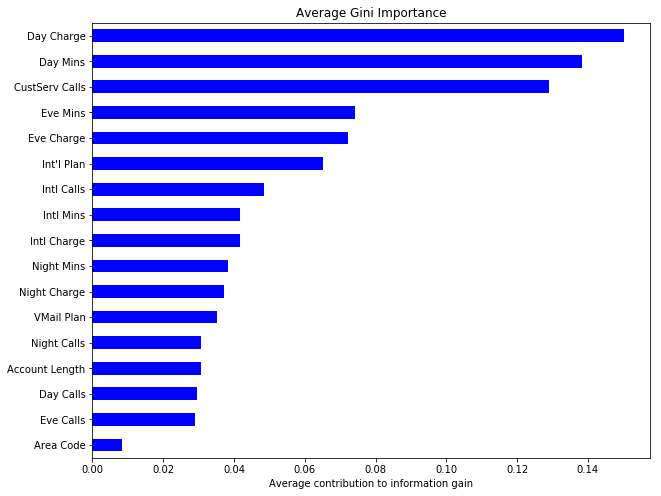

In [102]:
# Plot the feature importances
churn_col = churn.drop("Churn?", axis=1)
# Plot the feature importance
feat_scores = pd.Series(model.feature_importances_,
                           index=churn_col.columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
#ax = plt.plot(importance)
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');


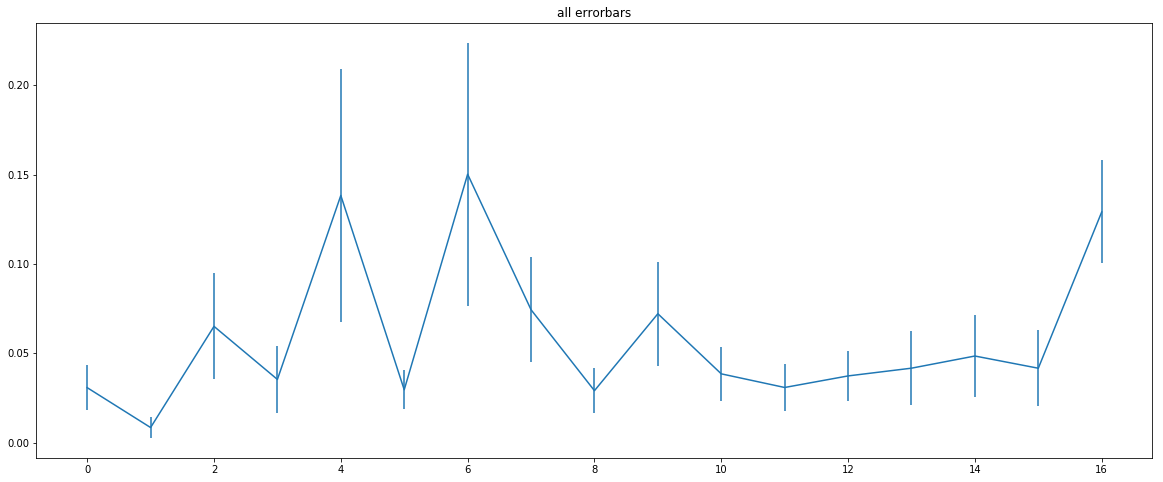

<Figure size 432x288 with 0 Axes>

In [135]:

importance = np.std([tree.feature_importances_
                            for tree in model.estimators_], axis=0)

x = range(importance.shape[0])
y = model.feature_importances_
yerr = importance

# Extend the code to find the standard deviation of the importance for each feature across all trees. 
fig, ax = plt.subplots(1,1, figsize=(20,8), sharex=True)
#axs.flatten()

ax.errorbar(x,y, yerr=yerr)
ax.set_title('all errorbars')


#fig.suptitle('Errors')
plt.show();
plt.tight_layout();


#plt.bar(x, y, yerr=yerr, align="center")

#plt.show()


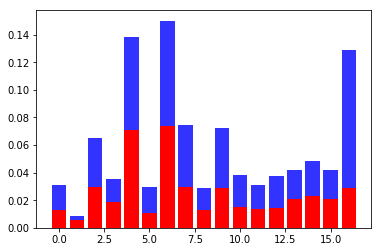

In [113]:
plt.bar(range(17), model.feature_importances_, color='b', alpha = .8) # feature importance
plt.bar(range(17),importance, color = 'r'); # standard deviation


In [ ]:
# Add error bars to your chart,width = standard deviation for that feature.